In [68]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure
import numpy as np

In [69]:
def getHOGDescriptor(imagePath):
    im = cv2.imread(imagePath)
    gr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
    gr1 = cv2.resize(gr,(64*2,64*2))

    fd, hog_image = hog(gr1, orientations=9, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualise=True)
    return fd

In [70]:

yourpath = '/home/spratik/Algo/OCR/test-data-set/positive1'
HOG_DESC = []
import os
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        ImagePath = os.path.join(root, name)
        #print ImagePath
        dec = getHOGDescriptor(ImagePath)
        HOG_DESC.append(dec)

#hog_dec = np.array(HOG_DESC)
#print hog_dec

In [71]:
yourpath = '/home/spratik/Algo/OCR/test-data-set/positive3'
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        ImagePath = os.path.join(root, name)
        #print ImagePath
        dec = getHOGDescriptor(ImagePath)
        HOG_DESC.append(dec)

hog_dec = np.array(HOG_DESC)


In [72]:
yourpath = '/home/spratik/Algo/OCR/test-data-set/positive2'
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        ImagePath = os.path.join(root, name)
        #print ImagePath
        dec = getHOGDescriptor(ImagePath)
        HOG_DESC.append(dec)

hog_dec = np.array(HOG_DESC)
print hog_dec.shape
print hog_dec

(16, 9216)
[[ 0.03888766  0.          0.16498637 ...,  0.14698503  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [74]:
target = np.array([1,1,1,1,1,3,3,3,3,3,3,2,2,2,2,2])
target.shape
target

array([1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2])

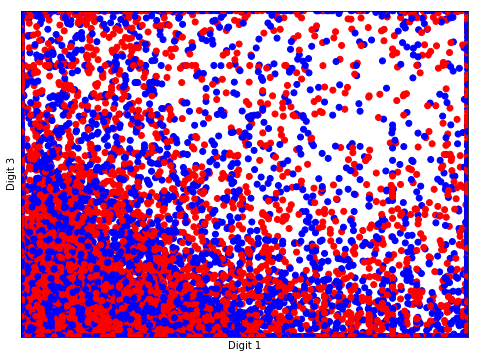

In [75]:
import matplotlib.pyplot as plt

X = hog_dec  # we only take the first two features.
y = target

x_min, x_max = X.min(), X.max() 
y_min, y_max = X.min() , X.max() 

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:5], X[6: 11],c=['red','blue'])
plt.xlabel('Digit 1')
plt.ylabel('Digit 3')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(hog_dec, target,test_size = 0.30,random_state=0)

In [77]:
x_train.shape

(11, 9216)

In [78]:
x_test

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.06852406, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24263127,  0.        ,  0.51469863, ...,  0.45901316,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [79]:
y_train

array([1, 1, 2, 3, 3, 2, 2, 1, 1, 3, 2])

In [80]:
y_test


array([1, 3, 3, 3, 2])

In [89]:
from sklearn import svm
#clf = SVC(kernel='rbf',random_state=33)
clf = svm.NuSVC(random_state=33)
clf.fit(x_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=33, shrinking=True,
   tol=0.001, verbose=False)

In [90]:
clf.score(x_test,y_test)

0.80000000000000004

In [91]:
y_p = clf.predict(x_test)

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_test, y_p)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 2]])

In [94]:
y_test

array([1, 3, 3, 3, 2])

In [95]:
y_p

array([1, 3, 3, 1, 2])